### Tugas Kelompok 4 - Penerapan K-Means


---
Anggota Kelompok:
*   2440103546 - Mahatmaditya Favian Rachman Syarief
*   2440099946 - Muh. Rizal Sakti Djatmieka
*   2440100683 - Gede Dyava Savitra
*   2440103911 - Ramadhani Al Amin
*   2440071733 - Bachatsa Taqiyya


In [50]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale
 
from sklearn.cluster import KMeans

In [51]:
df = pd.read_csv("/content/sample_data/Online Retail.csv", sep = ',',encoding = "ISO-8859-1", header= 0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [52]:
# Mengispeksi data
df.shape

(234848, 8)

In [53]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,234848.000000,234848.000000,168833.000000
mean,9.280241,5.105973,15275.783863
std,225.468659,120.322987,1724.747909
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13837.000000
50%,3.000000,2.100000,15144.000000
75%,10.000000,4.210000,16814.000000
max,74215.000000,38970.000000,18287.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234848 entries, 0 to 234847
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    234848 non-null  object 
 1   StockCode    234848 non-null  object 
 2   Description  233957 non-null  object 
 3   Quantity     234848 non-null  int64  
 4   InvoiceDate  234848 non-null  object 
 5   UnitPrice    234848 non-null  float64
 6   CustomerID   168833 non-null  float64
 7   Country      234848 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 14.3+ MB


## Data Cleansing

In [55]:
# Mengurai data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%d-%m-%Y %H:%M")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data quality check and cleaning

In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [57]:
# Check nilai null
df.isnull().values.any()

True

In [58]:
# Check jumlah null
df.isnull().sum()*100/df.shape[0]

InvoiceNo       0.000000
StockCode       0.000000
Description     0.379394
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     28.109671
Country         0.000000
dtype: float64

In [59]:
# Menghapus / drop row atau cells yang mengandung nilai null
df = df.dropna()

In [60]:
# Lalu kita memastikan apakah masih terdapat nilai null
df.isnull().sum()*100/df.shape[0]

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

## RFM
recency, frequency, dan monetary value

In [61]:
df["Amount"]  = df.Quantity * df.UnitPrice

Monetary value

In [62]:
monetary = df.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,2205.95
2,12348.0,1487.24
3,12350.0,334.40
4,12352.0,601.18


Frequency Value

In [63]:
frequency = df.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,102
2,12348.0,28
3,12350.0,17
4,12352.0,48


Merging Amount and Frequency columns

In [64]:
main = monetary.merge(frequency, on = "CustomerID", how = "inner")
main.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,2205.95,102
2,12348.0,1487.24,28
3,12350.0,334.40,17
4,12352.0,601.18,48


RFM --- Recency value

In [65]:
maximum = max(df.InvoiceDate)

In [66]:
maximum = maximum + pd.DateOffset(days = 1)

In [67]:
df['Diff'] = maximum - df.InvoiceDate
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,203 days 04:09:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,203 days 04:09:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,203 days 04:09:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,203 days 04:09:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,203 days 04:09:00


In [68]:
recency = df.groupby('CustomerID').Diff.min()
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,155 days 02:18:00
1,12347.0,12 days 23:34:00
2,12348.0,78 days 01:48:00
3,12350.0,139 days 20:34:00
4,12352.0,91 days 20:27:00


### Menggabungkan Dataframe dari semua parameter Recency, Frequency, dan Monetery

In [69]:
RFM = main.merge(recency, on = "CustomerID")
RFM.columns = ['CustomerID','Amount','Frequency','Recency']
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,155 days 02:18:00
1,12347.0,2205.95,102,12 days 23:34:00
2,12348.0,1487.24,28,78 days 01:48:00
3,12350.0,334.40,17,139 days 20:34:00
4,12352.0,601.18,48,91 days 20:27:00


In [70]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 0 to 2941
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  2942 non-null   float64        
 1   Amount      2942 non-null   float64        
 2   Frequency   2942 non-null   int64          
 3   Recency     2942 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 114.9 KB


In [71]:
RFM_norm1 = RFM.drop("CustomerID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [72]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-0.282928,-0.515943,1.465670
1,0.233226,0.415578,-0.966943
2,0.065060,-0.273748,0.155802
3,-0.204684,-0.376215,1.193490
4,-0.142262,-0.087443,0.376948


## Penerapan algoritma K-means

In [73]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

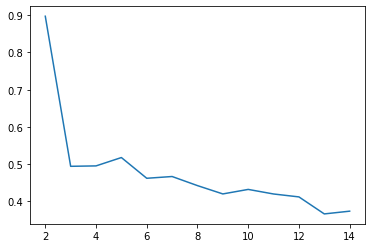

In [74]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [75]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(RFM_norm1)

KMeans(max_iter=50, n_clusters=5)

In [76]:
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency', 'ClusterID']
RFM_km.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,155 days 02:18:00,0
1,12347.0,2205.95,102,12 days 23:34:00,2
2,12348.0,1487.24,28,78 days 01:48:00,2
3,12350.0,334.40,17,139 days 20:34:00,0
4,12352.0,601.18,48,91 days 20:27:00,2


In [77]:
RFM_km.tail()

,CustomerID,Amount,Frequency,Recency,ClusterID
2937,18277.0,-12.75,1,148 days 00:01:00,0
2938,18280.0,180.60,10,107 days 02:43:00,0
2939,18281.0,80.82,7,10 days 01:42:00,2
2940,18283.0,638.77,256,8 days 00:54:00,4
2941,18287.0,765.28,29,31 days 01:56:00,2


In [78]:
RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [79]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,372.949222,24.300541,143.778378
1,1,90524.230000,402.000000,5.250000
2,2,826.816156,43.165148,36.929385
3,3,26840.298000,1296.700000,4.800000
4,4,4575.097858,226.647773,18.700405


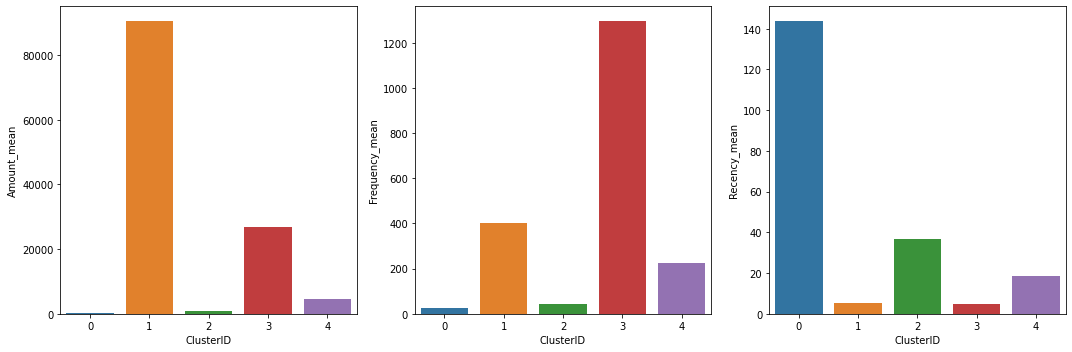

In [80]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=df.ClusterID, y=df.Amount_mean, ax = axs[0])
sns.barplot(x=df.ClusterID, y=df.Frequency_mean, ax = axs[1])
sns.barplot(x=df.ClusterID, y=df.Recency_mean, ax = axs[2])
plt.tight_layout()            
plt.show()